# CS4305TU: Week 6 - Artificial Neural Network - Assignment
## Investigating neighbourhood choice behaviour using ANNs
**7 & 11 October 2021**

- Sander van Cranenburgh
- Francisco Garrido-Valenzuela 

### General information

* For this assignment we will use *Stated Choice data* on residential location choice, collected in:
    - Mainz, Germany
    - Hanover, Germany
    - Bern, Switzerland
    - Zurich, Switzerland 

- For more details on the data, see the description provided on [Brightspace](https://brightspace.tudelft.nl/d2l/le/content/399675/viewContent/2506146/View). 

- In total you can earn **6.0** points in this assignment. 

- Add **Code cells** to complement your analyses. You can draw a lot form the snippets of codes we used for the in-class exercises.

### Submission instructions

- Answer the questions (code and/or text) in this notebook
- Rename this file by adding your group nomber (e.g. Assignment_groupXX.ipynb)
- Submit your answers both in ipynb and html format

**Provide your answers in the allocated markdown boxes** (with the red font color)


### Set up your environment

You need to set up your environment based on which platform you would like to use. In this case we offer two options:

- Google Colaboratory (Colab)
- Jupyter Lab or Notebooks (Local)

#### Using Colab

Students using **Colab**, just need to install **Biogeme**. Biogeme is a Python package designed for the maximum likelihood estimation of parametric models in general, with a special emphasis on discrete choice models. Just run the following notebook cell:

In [88]:
# Uncomment and run this cell if you are using Google Colab (keep the exclamation mark)
#!pip install biogeme
#!git clone https://github.com/cs4305tu/assignment
#root = 'assignment/'

#### Using local environment

Students using their *local environments*, need to install all the dependencies used in this *Week 6*, to ensure compatibility, they also need to check the versions of each dependency. All dependencies are contained in the text file: **requirements.txt**. Just run the following notebook cell:

In [89]:
# Uncomment and run this cell if you are using your local environment (keep the exclamation mark)
# !pip3 install -r requirements.txt
# root = ''

### Required Python packages

In the following cell add all the packages you need to finish this assignment.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from heatmap import corrplot
import biogeme.biogeme as bio
import biogeme.database as db
import biogeme.optimization as opt
import biogeme.messaging as msg
from biogeme import models
from biogeme.expressions import Beta

### Opening the database

In [2]:
# Load the data into a dataframe
root = ''
df = pd.read_csv(f'{root}datasets/neighbourhood_choice2018.dat', sep='\t')
df.head()

,ID,ID2,STORES1,TRANSPORT1,CITY1,NOISE1,GREEN1,FOREIGN1,STORES2,TRANSPORT2,...,NOISE3,GREEN3,FOREIGN3,CHOICE,SSTADT,RESPCITY,WOMAN,AGE,ENVCONC,COMPLETE
0,2,5,10,5,1,2,2,0.4,15,10,...,4,4,0.2,1,3,3,0,42,3.0,1
1,2,6,15,5,4,4,1,0.1,2,10,...,2,3,0.3,2,3,3,0,42,3.0,1
2,2,7,10,15,1,3,1,0.4,15,2,...,1,3,0.2,3,3,3,0,42,3.0,1
3,2,8,15,15,5,4,4,0.4,2,2,...,2,2,0.2,2,3,3,0,42,3.0,1
4,3,9,15,5,5,1,3,0.4,2,10,...,3,1,0.2,2,2,2,1,41,4.5,1


## Questions

### Q1. Do a proper descriptive analysis of the data set (1.0 pt)

It is good practice to do a descriptive analysis of the data you want to model, prior to the real modelling. So inspect e.g. what levels the attributes (features) take, correlations, class (im)balances, redudant variables, missing values, etc. to attain a good feeling for the data.

In [14]:
# All features in dataset, devided into the choice feature, and additional feaures.
features_choices = ['STORES', 'TRANSPORT', 'CITY', 'NOISE', 'GREEN', 'FOREIGN']
features_other = ['WOMAN', 'AGE', 'SSTADT', 'RESPCITY', 'ENVCONC']
print(f'The choice features are: {features_choices}')
print(f'Other available features are: {features_other}')
print(f"The evaluation metric is ['CHOICE']")


# Check for Nan values in dataset
print(f'\nTotal number of Nan values: {df.isna().sum().sum()}')
# Check for empty (None) values in dataset
print(f'Total number of empty (None) values: {int(df[df==None].sum().sum())}')
# Check for complete responses
print(f'Total number of incomplete responses: {df.COMPLETE[df.COMPLETE==0].sum()}')

# Check the various levels that each feature can take
print('\nCheck the levels that each feature can take:')
print('Choice features:')
for feature in features_choices:
    feature_choice = [feature+str(choice) for choice in range(1, 4)]
    levels = np.unique(df[feature_choice].to_numpy().flatten())
    print(f"\t{feature} can take: {levels}")
print('Other features')
for feature in features_other:
    levels = np.unique(df[feature].to_numpy().flatten())
    print(f"\t{feature} can take: {levels}")

# Check for faulty values
print(f'\nTotal number of 99999 values in AGE: {df.AGE[df.AGE==99999].size}')
print(f'nTotal number of 99999 values in WOMAN: {df.WOMAN[df.WOMAN==99999].size}')
print(f'nTotal number of 9.99990000e+04 values in ENVCONC: {df.ENVCONC[df.ENVCONC==9.99990000e+04].size}')



The choice features are: ['STORES', 'TRANSPORT', 'CITY', 'NOISE', 'GREEN', 'FOREIGN']
Other available features are: ['WOMAN', 'AGE', 'SSTADT', 'RESPCITY', 'ENVCONC']
The evaluation metric is ['CHOICE']

Total number of Nan values: 0
Total number of empty (None) values: 0
Total number of incomplete responses: 0

Check the levels that each feature can take:
Choice features:
	STORES can take: [ 2  5 10 15]
	TRANSPORT can take: [ 2  5 10 15]
	CITY can take: [1 2 4 5]
	NOISE can take: [1 2 3 4]
	GREEN can take: [1 2 3 4]
	FOREIGN can take: [0.1 0.2 0.3 0.4]
Other features
	WOMAN can take: [    0     1 99999]
	AGE can take: [   18    19    20    21    22    23    24    25    26    27    28    29
    30    31    32    33    34    35    36    37    38    39    40    41
    42    43    44    45    46    47    48    49    50    51    52    53
    54    55    56    57    58    59    60    61    62    63    64    65
    66    67    68    69    70 99999]
	SSTADT can take: [1 2 3 4]
	RESPCITY can ta

Total number of choices: 9720
--------------------------------
	 Number of choices equal to 1: 3440 --> 35.39% of total
	 Number of choices equal to 2: 3266 --> 33.6% of total
	 Number of choices equal to 3: 3014 --> 31.01% of total


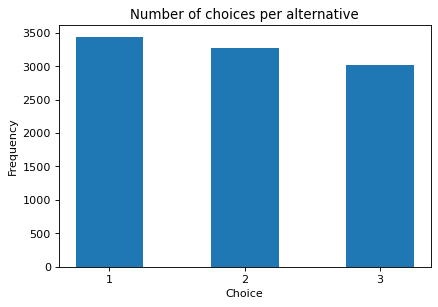

In [18]:
# Show how often each alternative is chosen
print(f"Total number of choices: {len(df.CHOICE)}")
print('--------------------------------')
for choice in range(1, 4):
    print(f"\t Number of choices equal to {choice}: {len(df.CHOICE[df.CHOICE == choice])} --> {round(len(df.CHOICE[df.CHOICE == choice])/len(df.CHOICE)*100, 2)}% of total")

fig=plt.figure(figsize=(6,4), dpi= 80, facecolor='w', edgecolor='k')
plt.hist(df.CHOICE, bins = [0.75, 1.25, 1.75, 2.25, 2.75, 3.25])
plt.xticks((1, 2, 3))
plt.title('Number of choices per alternative')
plt.xlabel('Choice')
plt.ylabel('Frequency')
plt.show()

Correlation of each feature to CHOICE, sorted by absolute value:
CHOICE        1.000000
GREEN1        0.269186
NOISE1        0.236012
GREEN3        0.221183
NOISE3        0.217670
TRANSPORT1    0.197005
TRANSPORT3    0.187422
NOISE2        0.168685
CITY3         0.165109
CITY1         0.153796
FOREIGN1      0.095885
TRANSPORT2    0.095360
STORES3       0.079537
CITY2         0.067889
FOREIGN3      0.064269
STORES1       0.060248
FOREIGN2      0.048984
GREEN2        0.025195
SSTADT        0.009905
RESPCITY      0.009905
AGE           0.007536
ENVCONC       0.006206
WOMAN         0.002445
STORES2       0.000457
Name: CHOICE, dtype: float64


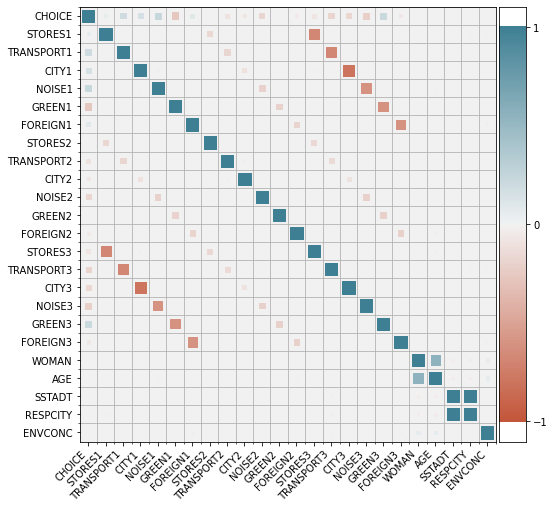

In [19]:
all_features = [features_choices[i]+str(j) for j in range(1, 4) for i in range(len(features_choices))]

corr = df[['CHOICE'] + all_features + features_other].corr()

corr_choice = corr['CHOICE']
abs_corr_sorted = corr_choice.abs().sort_values(ascending=False)     # sorted by largest correlation to income

print('Correlation of each feature to CHOICE, sorted by absolute value:')
print(abs_corr_sorted)

plt.figure(figsize=(8, 8))
corrplot(corr, size_scale=150)

In [20]:
# Drop features that are leased relatted to choice
df_reduced = df.drop(['STORES2'] + features_other + ['COMPLETE', 'ID', 'ID2'], axis=1)
# df_reduced = df.drop(['STORES2', 'GREEN2', 'FOREIGN2'] + features_other + ['COMPLETE', 'ID', 'ID2'], axis=1)
# df_reduced = df.drop(['STORES2', 'GREEN2', 'FOREIGN2', 'STORES1', 'FOREIGN3', 'CITY2'] + features_other + ['COMPLETE', 'ID', 'ID2'], axis=1)

df_reduced.head()

,STORES1,TRANSPORT1,CITY1,NOISE1,GREEN1,FOREIGN1,TRANSPORT2,CITY2,NOISE2,GREEN2,FOREIGN2,STORES3,TRANSPORT3,CITY3,NOISE3,GREEN3,FOREIGN3,CHOICE
0,10,5,1,2,2,0.4,10,2,3,3,0.1,2,15,4,4,4,0.2,1
1,15,5,4,4,1,0.1,10,5,1,2,0.2,5,15,1,2,3,0.3,2
2,10,15,1,3,1,0.4,2,2,4,2,0.1,2,5,4,1,3,0.2,3
3,15,15,5,4,4,0.4,2,1,1,1,0.1,5,5,2,2,2,0.2,2
4,15,5,5,1,3,0.4,10,1,2,4,0.1,5,15,2,3,1,0.2,2


<font color='red'>

**ANSWER Q1** <br>
The dataset is seen to consist out of two main set of features. The first set is the various 'choice features' available for each of the three choices; and the second set consist of 'other features', which contain information regarding the applicant, e.g.: age, woman (yes or no), place of citizenship.

Considering all the available data, the dataset is checked for Nan and empty values. It is found that none of these input types are present. It is also checked whether all choices are complete, which is done by evaluation the COMPLETE feature. This is also found to true for all choices.

Then, the type of levels each feature can take-on are obtained. For the choice features, no irrelevant/faulty levels are seen to exist in the dataset. For the 'other features', it can be seen that the WOMAN, AGE, and ENVCONC, contain irrelevant/faulty levels, equal to 99999. The number of occurances of these irrelevant levels are obtained for the three features. As later-on it will be found that these 'other features' do not relate to the CHOICE output, they will be discarded. Therefore, there is no need to correct for these faulty levels.

Furthermore, the data is seen to be nicely balanced, with a distribution of 35.4%, 33.6%, and 31%, for the three choices, respectively.

Finally, the correlations for all features to the CHOICE are constructed. These correlations are plotted, from which it can be seen that the 'other features' are not related to the CHOICE, and can therefore be discarded in the model. It is also found that ['STORES2', 'GREEN2', 'FOREIGN2', 'STORES1', 'FOREIGN3', 'CITY2'] do also have a small correlation to CHOICE. By removing some or all of these features, and evaluating the model performance, it is decided to remove the following features from the model: ...


### Q2. Estimate a RUM-MNL discrete choice model (1.0 pt)

Assume utility is linear additive-utility: 

$ V_{in} = \sum_{m}\beta_m x_{imn}$

And estimate marginal utilities (i.e. betas) for: 

1. Distance to Transport [min] (**Note** that distances are given in minutes)
2. Distance to City [km]
3. Distance to Stores [min] (**Note** that distances are given in minutes)
4. Traffic Noise
5. Green area
6. Share of foreigners [%]

**Note:** Do not add any other variables (features) to the model.

**To get the scores, address the following:**

- (A) Report the parameter estimates, and interpret them. i.e. do they have the expected sign? (0.5 pts)
- (B) Compute and report the cross-entropy (0.5 pts)

In [21]:
# Create a DataFrame with pandas and database variable for Biogeme estimation
database = db.Database('residential_choicedata2021', df)

# The following statement allows you to use the names of the variable stored in Biogeme as Python variables.
globals().update(database.variables)

In [22]:
B_stores = Beta('B_stores', 0, None, None, 0)
B_transport = Beta('B_transport', 0, None, None, 0)
B_city = Beta('B_city', 0, None, None, 0)
B_noise = Beta('B_noise', 0, None, None, 0)
B_green = Beta('B_green', 0, None, None, 0)
B_foreign = Beta('B_foreign', 0, None, None, 0)

In [23]:
# Utility functions
V1 = B_stores * STORES1 + B_transport * TRANSPORT1 + B_city * CITY1 + B_noise * NOISE1 + B_green * GREEN1 + B_foreign * FOREIGN1
V2 = B_stores * STORES2 + B_transport * TRANSPORT2 + B_city * CITY2 + B_noise * NOISE2 + B_green * GREEN2 + B_foreign * FOREIGN2
V3 = B_stores * STORES3 + B_transport * TRANSPORT3 + B_city * CITY3 + B_noise * NOISE3 + B_green * GREEN3 + B_foreign * FOREIGN3

In [24]:
# Associate utility functions with the numbering of alternatives in df.CHOICE
V = {1: V1, 2: V2, 3: V3}

# Associate the availability conditions with the alternatives
av = {1:1, 2:1, 3:1}

In [25]:
# Definition of the model. This is the contribution of each observation to the log likelihood function.
prob = models.loglogit(V, av, CHOICE)

# Create the Biogeme object
biogeme = bio.BIOGEME(database, prob)
biogeme.modelName = 'My first discrete choice model'
biogeme.generatePickle = False
biogeme.generateHtml = False

# Calculate the null log likelihood for reporting.
biogeme.calculateNullLoglikelihood(av)

# Estimate the parameters
results = biogeme.estimate()

# Report the results in a pandas table
print('Estimated parameters')
print('----------')
pandasResults = results.getEstimatedParameters()
print(pandasResults[['Value','Std err','t-test','p-value']])


Estimated parameters
----------
                Value   Std err     t-test  p-value
B_city      -0.167377  0.007949 -21.055742      0.0
B_foreign   -1.196023  0.109408 -10.931775      0.0
B_green      0.415894  0.011616  35.802485      0.0
B_noise     -0.437468  0.011335 -38.594267      0.0
B_stores    -0.034433  0.002577 -13.363956      0.0
B_transport -0.073962  0.002548 -29.026039      0.0



In [26]:
from sklearn.metrics import log_loss

# Get the estimated betas from the discrete choice model
betas = results.getBetaValues()

# Define compute objects
prob_1 = models.logit(V, av, 1)
prob_2 = models.logit(V, av, 2)
prob_3 = models.logit(V, av, 3)

# Define dictionary
simulate_dict = {
    'Prob_1': prob_1,
    'Prob_2': prob_2,
    'Prob_3': prob_3}

# Create Biogeme object
simulator = bio.BIOGEME(database, simulate_dict)

# Compute probabilities using the estimated choice model
probs_DCM = simulator.simulate(betas)

# Compute the cross-entropy for the DCM
cross_entropy_DCM = log_loss(df.CHOICE,probs_DCM)

print('The cross-entropy of the DCM is        ',"{:.3f}".format(cross_entropy_DCM))


The cross-entropy of the DCM is         0.889


<font color='red'>

**ANSWER Q2** <br>
...

### Q3. Based on your results, compute the WtP of the average decision maker to reduce the share of foreigners in a neighbourhood by 1 percentage point in terms of the distance to the grocery stores (0.5 pts)

Thus, the answer must be of the following form: .... [minutes/percentage point].


<font color='red'>

**ANSWER Q3** <br>
...

### Q4. Train a hybrid RUM-MNL-ANN model (1.5 pts)

Since we are interested in the WtP of Q3, make sure when building the hybrid model to place the features of the share of foreigners and of the distance to the grocery stores in the *MNL part of the model*. For the *ANN part of the model* use 2 hidden layers, with 5 nodes each. 


**To get the scores, address the following:**


- (A) Build the model, plot the loss as a function of the epochs & report the cross entropy of your final model based on the test data. (1.0 pt)
- (B) Compare the model performance to that of the discrete choice model. Interpret the result. (0.5 pts)

<font color='red'>

**ANSWER Q4** <br>
...

### Q5. Compute the WtP of the average decision maker to reduce the share of foreigners in a neighbourhood by 1 percentage point using the results from the hybrid model. Compare the outcome with the results of your discrete choice model (0.5 pts)

<font color='red'>

**ANSWER Q5** <br>
...

### Q6. Explore whether, or not, the preferences of the inhabitants of the four cities regarding the trade-off between share of foreigners and distance to grocery stores are equal across the four cities. (1.5 pts)

Perform a series of (clever) analyses, and interpret the findings. In other words, can we conclude that the inhabintants of all cities are equally xenophobic? For these analysis, use hybrid models, and/or DCMs.

**Hint:** create new features capturing for the share of foreigners *per city*. 

<font color='red'>

**ANSWER Q6** <br>
...